
# Project: Loan Data Invistigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this analysis, we explore loan data from Prosper. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snc
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pd.get_option('display.max_columns', None)
df1= pd.read_csv('prosperLoanData.csv')
df1.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df1.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


> **Comment**: We have 81 features related to the loan data. we want to reduce our features and focus on features which are related to the loan status.

In [5]:
df1.count().sort_values()

GroupKey                          13341
LoanFirstDefaultedCycleNumber     16952
ScorexChangeAtTimeOfListing       18928
ProsperPrincipalOutstanding       22085
ProsperPrincipalBorrowed          22085
                                  ...  
IncomeRange                      113937
IncomeVerifiable                 113937
StatedMonthlyIncome              113937
CurrentlyInGroup                 113937
Investors                        113937
Length: 81, dtype: int64

In [6]:
df1.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
72863,F29035746949011632C41D8,750420,2013-04-11 07:53:09.863000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-188.98,0.0,0.00,0.0,0.00,1.0,0,0,0.0,1
83230,E1D235726143158112ADC37,718984,2013-02-24 19:57:55.917000000,NaN,12,Completed,2013-05-07 00:00:00,0.12458,0.0873,0.0773,...,-3.50,0.0,0.00,0.0,0.00,1.0,0,0,0.0,48
106356,B8C73397323563312E187A4,185950,2007-08-12 14:35:21.207000000,HR,36,Completed,2010-08-20 00:00:00,0.30962,0.2900,0.2700,...,-17.60,0.0,0.00,0.0,0.00,1.0,0,0,0.0,13
8964,44ED35859961688643108FF,872241,2013-08-17 08:43:05.953000000,NaN,60,Current,NaN,0.25102,0.2259,0.2159,...,-43.84,0.0,0.00,0.0,0.00,1.0,0,0,0.0,1
83544,9CDE3430194993149916DB8,393221,2008-09-04 19:30:22.970000000,E,36,Defaulted,2011-11-15 00:00:00,0.32378,0.3000,0.2900,...,-62.92,-388.4,485.82,0.0,261.62,1.0,0,0,0.0,70


## Data Cleaning 
#### Criteria >> Which Numerical Features are unique and not collerated? / Which Categorical Features have less categories?

> **Step_1**: Numerical Features 'int'

In [7]:
all_int = df1.select_dtypes('int64')
all_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   ListingNumber               113937 non-null  int64
 1   Term                        113937 non-null  int64
 2   ListingCategory (numeric)   113937 non-null  int64
 3   OpenRevolvingAccounts       113937 non-null  int64
 4   LoanCurrentDaysDelinquent   113937 non-null  int64
 5   LoanMonthsSinceOrigination  113937 non-null  int64
 6   LoanNumber                  113937 non-null  int64
 7   LoanOriginalAmount          113937 non-null  int64
 8   Recommendations             113937 non-null  int64
 9   InvestmentFromFriendsCount  113937 non-null  int64
 10  Investors                   113937 non-null  int64
dtypes: int64(11)
memory usage: 9.6 MB


1. ListingNumber, and LoanNumber are just unique ordinal data to discribe the loan with no value for analysis 

In [8]:
df= df1.drop(columns=['ListingNumber','LoanNumber'], inplace= False) 
df.shape[1]

79

2. Rcommendations and InvestmentFromFriendsCount, are mainly zeros ,so we can exclude them from our analysis   

In [9]:
(df.Recommendations==0).sum()/df1.shape[0],\
(df.InvestmentFromFriendsCount==0).sum()/df1.shape[0]

(0.9626196933393015, 0.9812966814994252)

In [10]:
df.drop(columns=['Recommendations','InvestmentFromFriendsCount'], inplace= True) 
df.shape[1] 

77

3. ListingCategory (numeric) should be categorical data with all loan reason

In [11]:
categ_list =  {0 :' Not Available', 1 :' Debt Consolidation', 2 :' Home Improvement', 3 :' Business', 4 :' Personal Loan', 5 :' Student Use', 6 :' Auto', 7:' Other', 8 :' Baby&Adoption', 9 :' Boat', 10 :' Cosmetic Procedure', 11 :' Engagement Ring', 12 :' Green Loans', 13 :' Household Expenses', 14 :' Large Purchases', 15 :' Medical/Dental', 16 :' Motorcycle', 17 :' RV', 18 :' Taxes', 19 :' Vacation', 20 :' Wedding Loans'}
df['loan_usage'] = df['ListingCategory (numeric)'].map(categ_list)
df.drop(columns='ListingCategory (numeric)',inplace=True)

> **Step_2**: Numerical Features 'float'

In [12]:
all_float = df1.select_dtypes('float64')
all_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BorrowerAPR                          113912 non-null  float64
 1   BorrowerRate                         113937 non-null  float64
 2   LenderYield                          113937 non-null  float64
 3   EstimatedEffectiveYield              84853 non-null   float64
 4   EstimatedLoss                        84853 non-null   float64
 5   EstimatedReturn                      84853 non-null   float64
 6   ProsperRating (numeric)              84853 non-null   float64
 7   ProsperScore                         84853 non-null   float64
 8   EmploymentStatusDuration             106312 non-null  float64
 9   CreditScoreRangeLower                113346 non-null  float64
 10  CreditScoreRangeUpper                113346 non-null  float64
 11  CurrentCredit

In [13]:
fl_zero_perc = ((all_float == 0).sum()/df1.shape[0]).sort_values() # check the percentage of zero values in our data frame
fl_zero_perc 

BorrowerAPR                            0.000000
PercentFunded                          0.000000
CreditScoreRangeUpper                  0.000000
ProsperScore                           0.000000
ProsperRating (numeric)                0.000000
TotalCreditLinespast7years             0.000000
EstimatedLoss                          0.000000
EstimatedEffectiveYield                0.000009
TotalProsperLoans                      0.000009
ProsperPrincipalBorrowed               0.000009
EstimatedReturn                        0.000009
TotalTrades                            0.000035
BorrowerRate                           0.000070
LenderYield                            0.000088
DebtToIncomeRatio                      0.000167
TradesNeverDelinquent (percentage)     0.000448
TotalProsperPaymentsBilled             0.000570
LoanFirstDefaultedCycleNumber          0.000614
OnTimeProsperPayments                  0.000658
CreditScoreRangeLower                  0.001167
CurrentCreditLines                     0

In [14]:
fl_null_perc = (all_float.count()/df1.shape[0]).sort_values() # check the percentage of zero values in our data frame
fl_null_perc 

LoanFirstDefaultedCycleNumber          0.148784
ScorexChangeAtTimeOfListing            0.166127
ProsperPaymentsLessThanOneMonthLate    0.193835
OnTimeProsperPayments                  0.193835
ProsperPrincipalOutstanding            0.193835
ProsperPaymentsOneMonthPlusLate        0.193835
TotalProsperLoans                      0.193835
TotalProsperPaymentsBilled             0.193835
ProsperPrincipalBorrowed               0.193835
ProsperScore                           0.744736
ProsperRating (numeric)                0.744736
EstimatedReturn                        0.744736
EstimatedLoss                          0.744736
EstimatedEffectiveYield                0.744736
DebtToIncomeRatio                      0.924923
EmploymentStatusDuration               0.933077
AmountDelinquent                       0.933103
CurrentCreditLines                     0.933261
BankcardUtilization                    0.933261
PublicRecordsLast12Months              0.933261
RevolvingCreditBalance                 0

1. Remove features with 75% percentages or more zero values 

In [15]:
float_remove1 = fl_zero_perc[fl_zero_perc > 0.75]  #decided to remove all columns with more than 75% of zeros
float_remove1.index

Index(['PublicRecordsLast10Years', 'CurrentDelinquencies', 'AmountDelinquent',
       'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'PublicRecordsLast12Months', 'LP_CollectionFees',
       'LP_NonPrincipalRecoverypayments', 'InvestmentFromFriendsAmount'],
      dtype='object')

In [16]:
df.drop(columns=float_remove1.index, inplace=True)
df.shape

(113937, 68)

2. Remove features with 20% percentages are null values

In [17]:
float_remove2 = fl_null_perc[fl_null_perc < 0.20]  #decided to remove all columns with more than 20% of null
float_remove2.index

Index(['LoanFirstDefaultedCycleNumber', 'ScorexChangeAtTimeOfListing',
       'ProsperPaymentsLessThanOneMonthLate', 'OnTimeProsperPayments',
       'ProsperPrincipalOutstanding', 'ProsperPaymentsOneMonthPlusLate',
       'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'ProsperPrincipalBorrowed'],
      dtype='object')

In [18]:
df.drop(columns=float_remove2.index, inplace=True)
df.shape

(113937, 59)

> **Step_3**: Transform Date features:
* We want to convert date columns as dataetime

In [19]:
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'])
df['FirstRecordedCreditLine'] = pd.to_datetime(df['FirstRecordedCreditLine'])
df['LoanOriginationYear']  = pd.DatetimeIndex(df['LoanOriginationDate']).year

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 60 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingCreationDate                 113937 non-null  object        
 2   CreditGrade                         28953 non-null   object        
 3   Term                                113937 non-null  int64         
 4   LoanStatus                          113937 non-null  object        
 5   ClosedDate                          55089 non-null   object        
 6   BorrowerAPR                         113912 non-null  float64       
 7   BorrowerRate                        113937 non-null  float64       
 8   LenderYield                         113937 non-null  float64       
 9   EstimatedEffectiveYield             84853 non-null   float64       
 10  Estimate

> **Step_4**: Categorical Features:
* We want to consider categorical data with minimum categories 

In [21]:
df1.select_dtypes('object').nunique().sort_values()

ProsperRating (Alpha)           7
EmploymentStatus                8
CreditGrade                     8
IncomeRange                     8
LoanStatus                     12
LoanOriginationQuarter         33
BorrowerState                  51
Occupation                     67
GroupKey                      706
LoanOriginationDate          1873
ClosedDate                   2802
FirstRecordedCreditLine     11585
MemberKey                   90831
DateCreditPulled           112992
ListingCreationDate        113064
LoanKey                    113066
ListingKey                 113066
dtype: int64

In [22]:
all_cat = df1.select_dtypes('object').nunique().sort_values()
cat_remove = all_cat[all_cat>2000] #decided to remove all categorical columns with more than 2000 categories
cat_remove.index 

Index(['ClosedDate', 'FirstRecordedCreditLine', 'MemberKey',
       'DateCreditPulled', 'ListingCreationDate', 'LoanKey', 'ListingKey'],
      dtype='object')

In [23]:
# drop all categorical columns more than 67 category
df.drop(columns= cat_remove.index ,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 53 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CreditGrade                         28953 non-null   object 
 1   Term                                113937 non-null  int64  
 2   LoanStatus                          113937 non-null  object 
 3   BorrowerAPR                         113912 non-null  float64
 4   BorrowerRate                        113937 non-null  float64
 5   LenderYield                         113937 non-null  float64
 6   EstimatedEffectiveYield             84853 non-null   float64
 7   EstimatedLoss                       84853 non-null   float64
 8   EstimatedReturn                     84853 non-null   float64
 9   ProsperRating (numeric)             84853 non-null   float64
 10  ProsperRating (Alpha)               84853 non-null   object 
 11  ProsperScore              

<a id='eda'></a>
## Exploratory Data Analysis


### 1. General Scatter plot for some important features

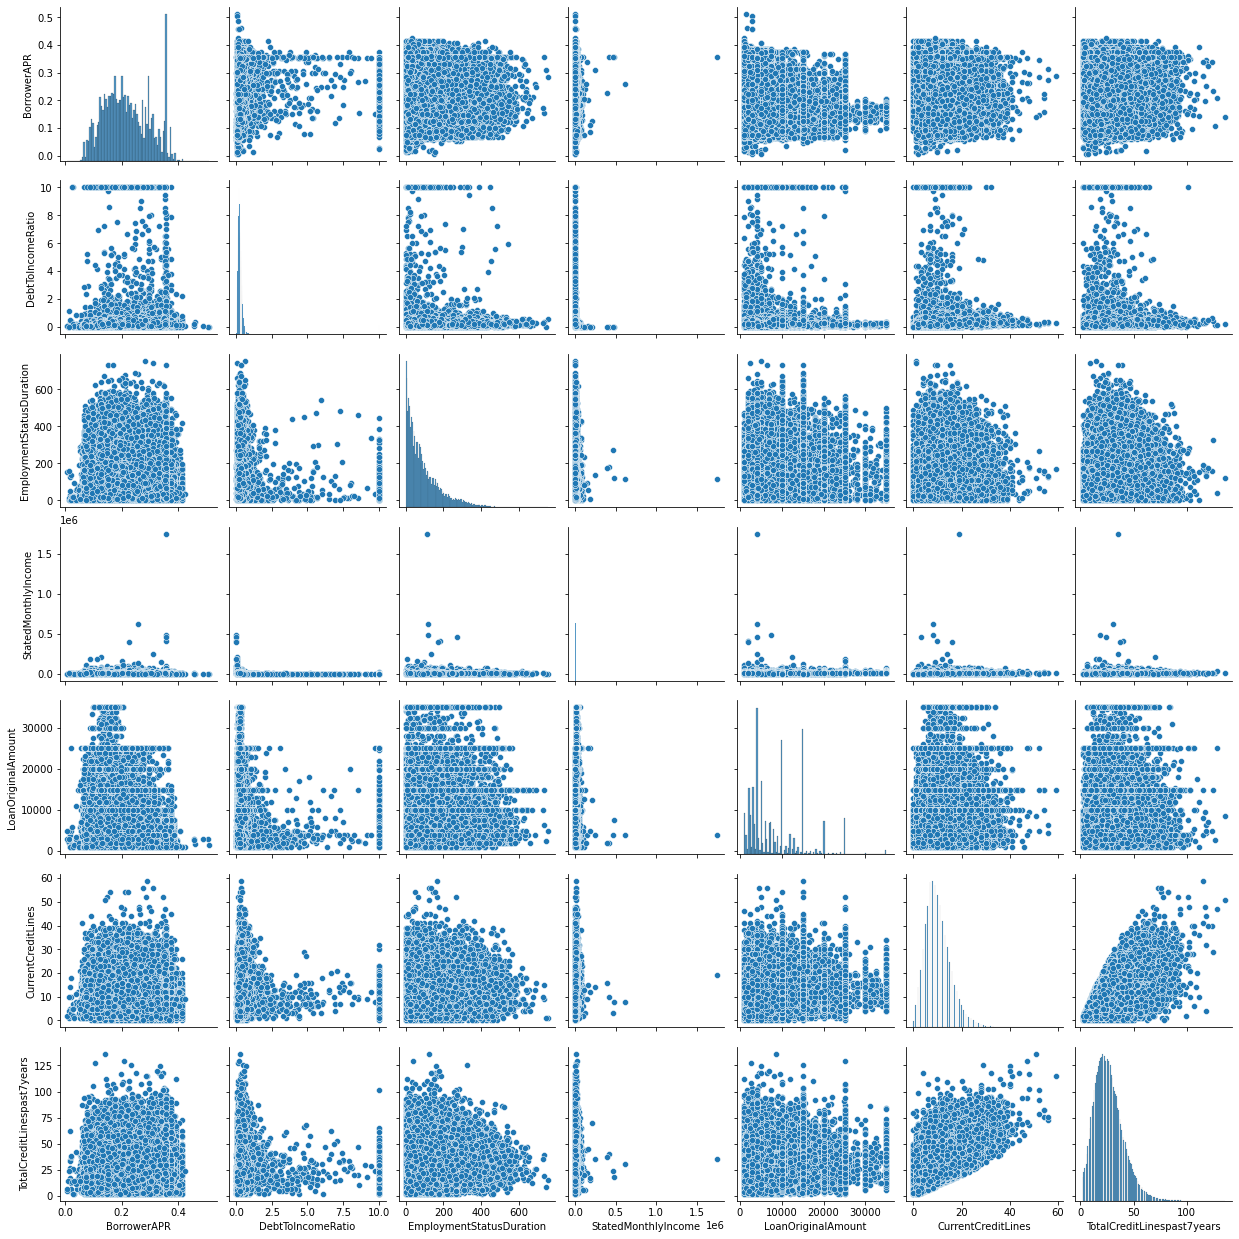

In [25]:
g = snc.pairplot(data = df, vars = ['BorrowerAPR','DebtToIncomeRatio','EmploymentStatusDuration',\
                                    'StatedMonthlyIncome', 'LoanOriginalAmount','CurrentCreditLines',\
                                    'TotalCreditLinespast7years']);

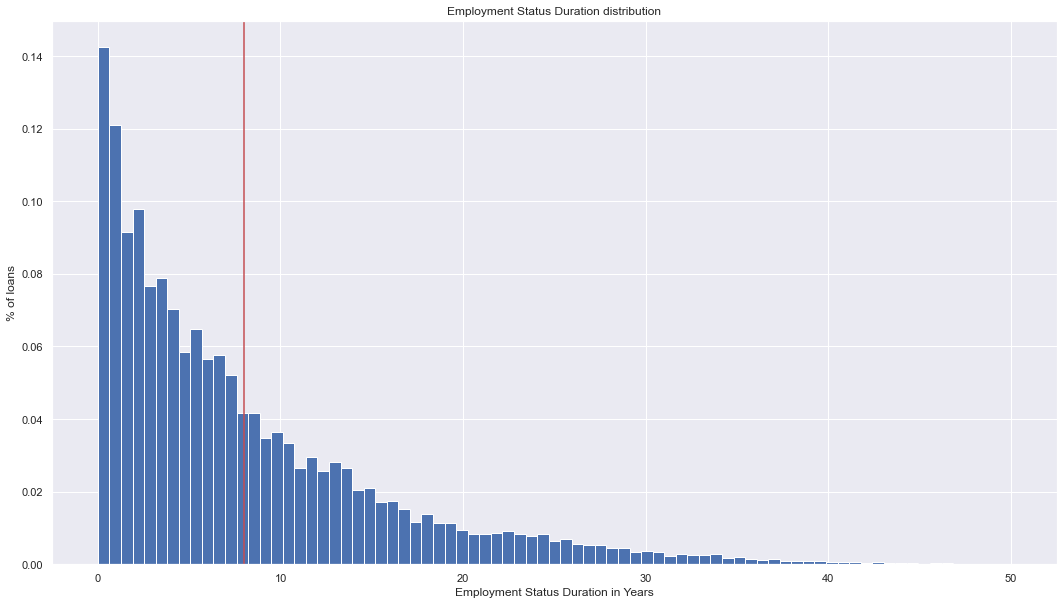

In [69]:
#ditribution of Employment Status Duration
plt.hist(df.EmploymentStatusDuration/12, bins = np.linspace(0,50,80), density = True )
plt.title('Employment Status Duration distribution')
plt.axvline(x=df.EmploymentStatusDuration.mean()/12, color = 'r')
plt.ylabel('% of loans')
plt.xlabel('Employment Status Duration in Years');

> **Insight**: Amount of Employment Status Duration is right skewed with average of 7 years of employment

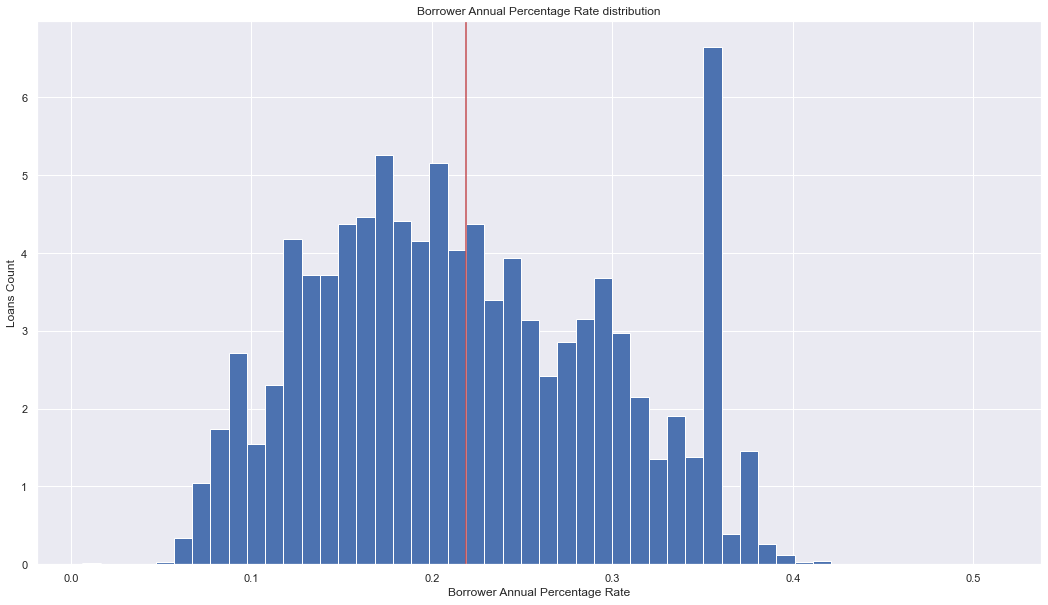

In [70]:
#ditribution of Borrower Annual Percentage Rate
plt.hist(df.BorrowerAPR, bins=50, density = True )
plt.title('Borrower Annual Percentage Rate distribution')
plt.axvline(x=df.BorrowerAPR.mean(), color = 'r')
plt.ylabel('Loans Count')
plt.xlabel('Borrower Annual Percentage Rate');

> **Insight**: BorrowerAPR is almost normaly distributed.

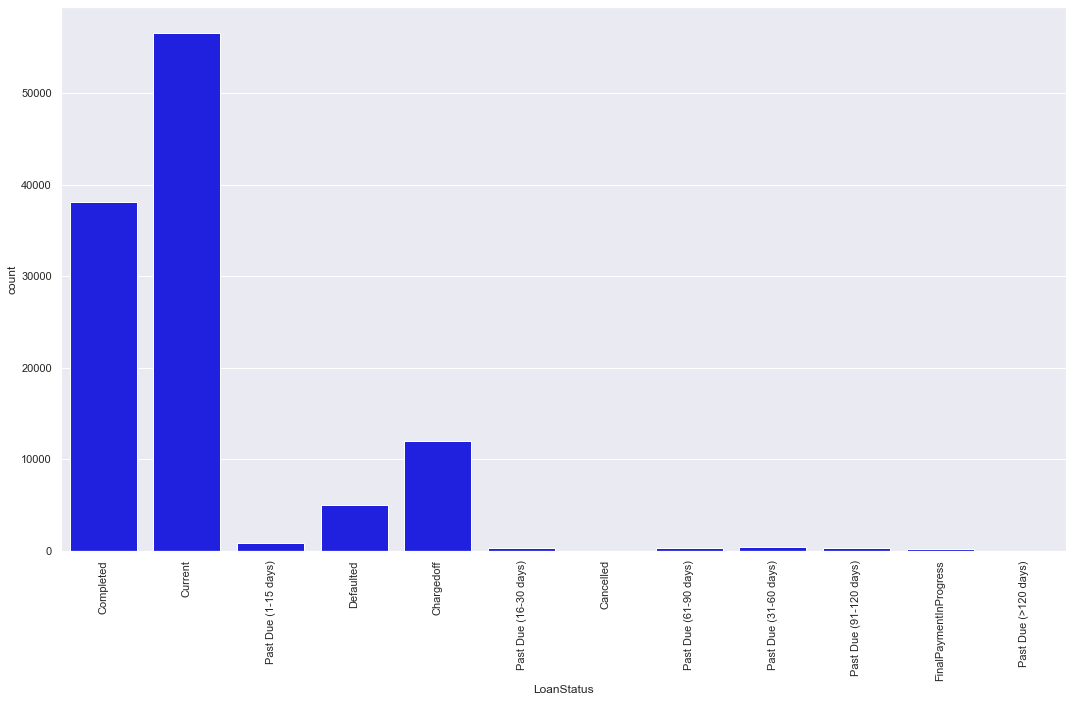

In [71]:
#ditribution of loan status
snc.countplot(data=df, x='LoanStatus', color='blue');
plt.xticks(rotation=90);

### 2. How Borrower Annual Percentage Rate fluctuate over the years?  

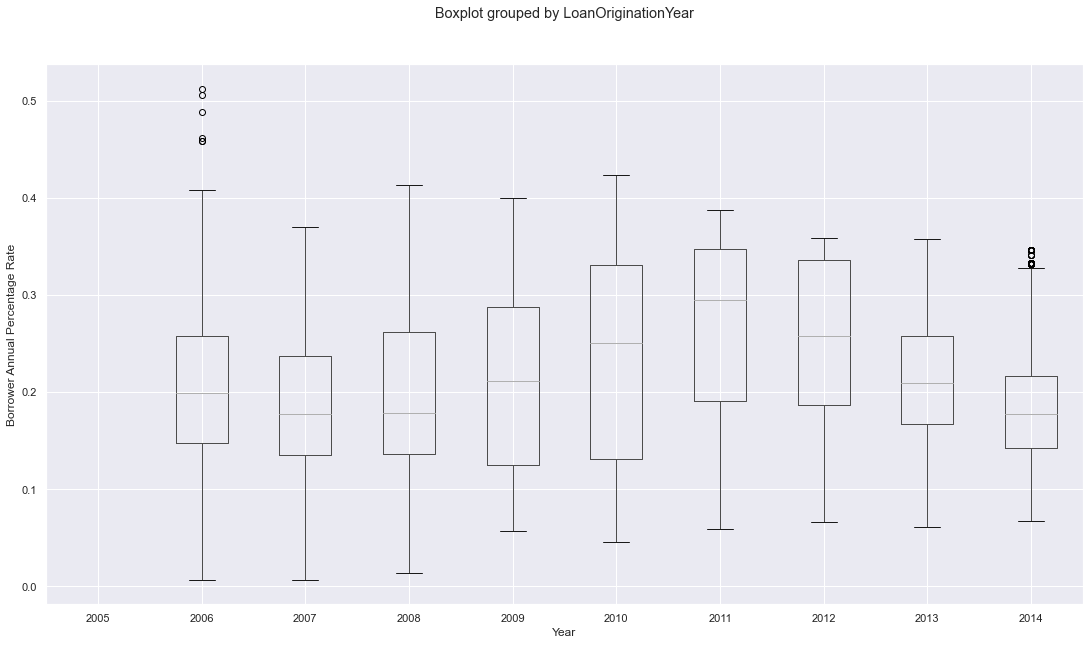

In [72]:
df.boxplot(by="LoanOriginationYear", column="BorrowerAPR")
plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Year')
plt.title('');

> **Insight**: There was an increase in loan rate after 2008, which is expected as recover action by the markt to the recession period, then it started to decline after 2011.

### 3. What are the main loan usages over the years?  

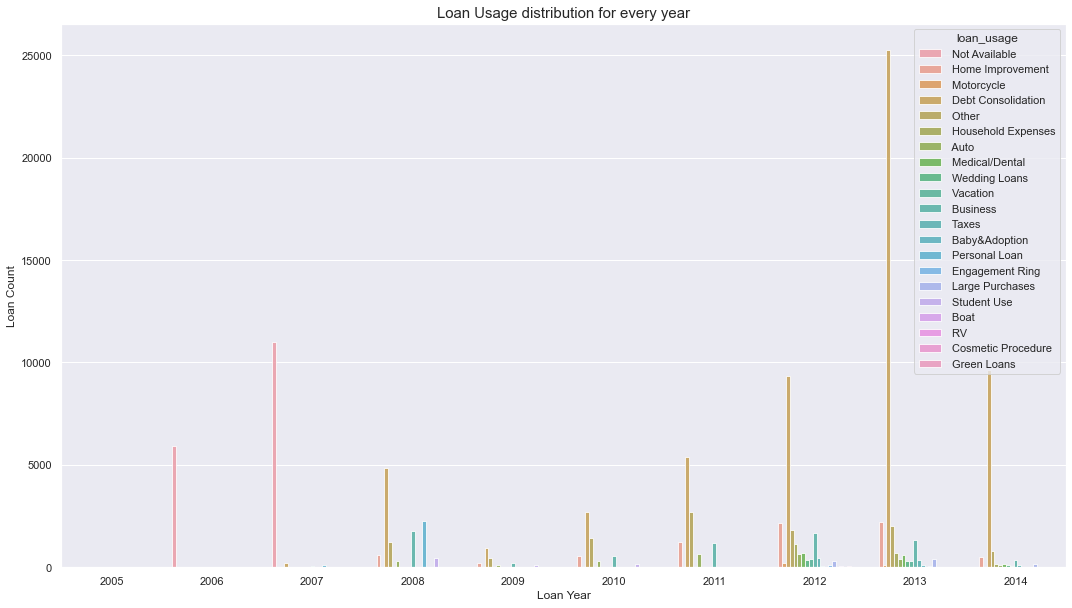

In [73]:
q2=snc.countplot(x="LoanOriginationYear", hue='loan_usage',
            alpha=0.8,data=df);
snc.set(rc={'figure.figsize':(15,10)});
q2.set_title("Loan Usage distribution for every year",fontsize=15,loc='center');
q2.set_xlabel("Loan Year",fontsize=12);
q2.set_ylabel("Loan Count",fontsize=12);

> **Insight**: We can see debt consolidation category started to spike after 2008. 

### 4. How Borrower APR affects Loan Status?  

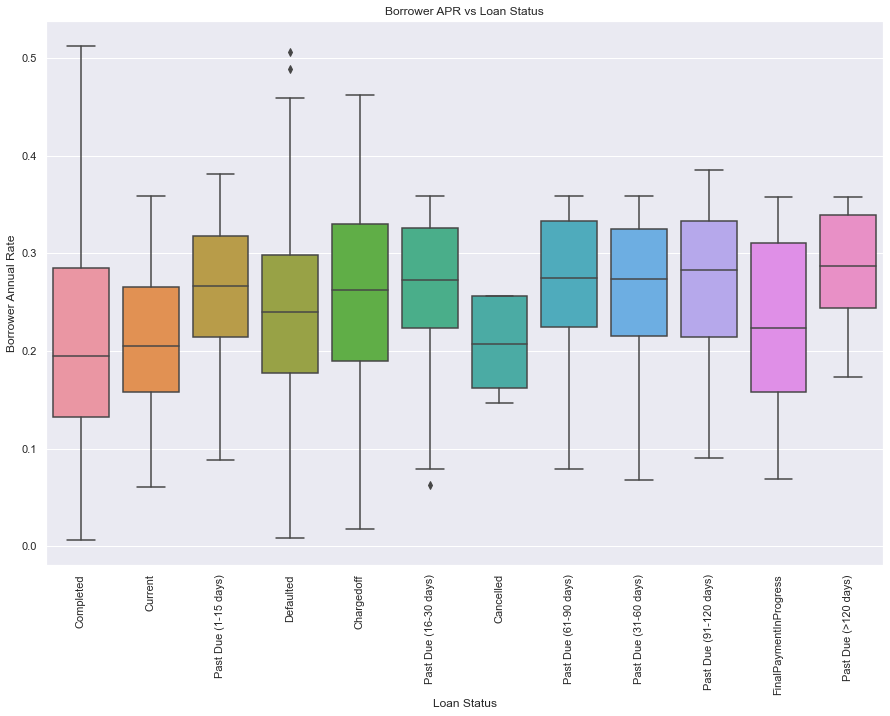

In [76]:
ax = snc.boxplot(x='LoanStatus', y="BorrowerAPR", data=df)
plt.title('Borrower APR vs Loan Status')
plt.ylabel('Borrower Annual Rate')
plt.xlabel('Loan Status')
plt.xticks(rotation=90);

> **Insight**: We can see that bad loan statuses (Chargedoff, Defaulted, Past Due) have higher APR compared to the good loan statuses (Completed, Current, FinalPaymentInProgress). 

### 5. How Debt to Income Ratio affects Loan Status?  

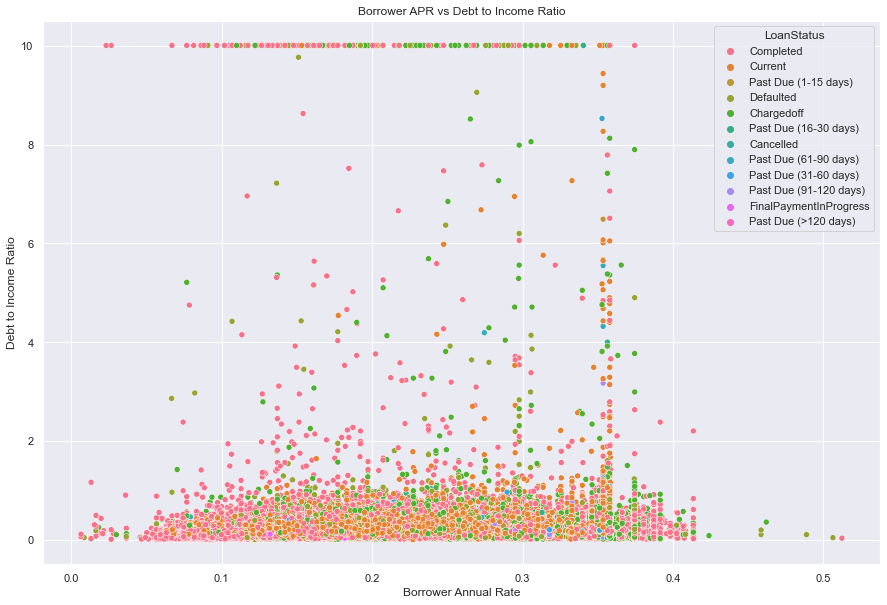

In [95]:
ax = snc.scatterplot(x="BorrowerAPR", y='DebtToIncomeRatio', hue='LoanStatus', data=df)
plt.xlabel('Borrower Annual Rate')
plt.ylabel('Debt to Income Ratio')
plt.title('Borrower APR vs Debt to Income Ratio');

> **Insight**: We can see that bad loan statuses (Chargedoff, Defaulted, Past Due) have higher APR and higher Debt to income ratio compared to the good loan statuses (Completed, Current, FinalPaymentInProgress). 

<a id='conclusions'></a>
## Conclusions

> **1**- We can see that bad loan statuses (Chargedoff, Defaulted, Past Due) have higher APR and higher Debt to income ratio compared to the good loan statuses (Completed, Current, FinalPaymentInProgress).

> **2**- We can see debt consolidation category started to spike after 2008.

> **3**- There was an increase in loan rate after 2008, which is expected as recover action by the markt to the recession period, then it started to decline after 2011.